In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/DavronbekSattorov/ThinkDSP/blob/master/code/thinkdsp.py

In [2]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as NP

class SawtoothSignal(Sinusoid):
       def evaluate(self, times):
        cycles = self.freq * times + self.offset / NP.pi / 2
        frac, _ = NP.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

In [3]:
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

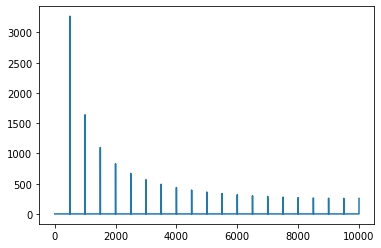

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()

In [6]:
def filter_spectrum(spectrum):
    """Divides the spectrum through by the fs.
    
    spectrum: Spectrum object
    """
    # avoid division by 0
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

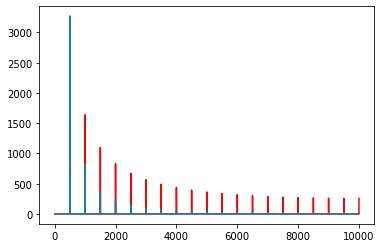

In [7]:
spectrum.plot(color='red')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

In [8]:
wave = spectrum.make_wave()
wave.make_audio()

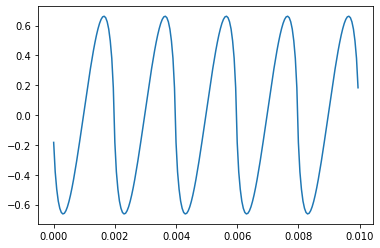

In [9]:
wave.segment(duration=0.01).plot()

In [11]:
from thinkdsp import CosSignal

freqs = NP.arange(500, 9500, 500)
amps = 1 / freqs**2
signal = sum(CosSignal(freq, amp) for freq, amp in zip(freqs, amps))
signal

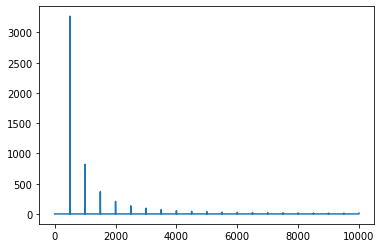

In [12]:
spectrum = wave.make_spectrum()
spectrum.plot()

In [13]:
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()